In [275]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# %matplotlib inline

In [30]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [17]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

The top 10 directors with most movies directed.

In [408]:
# The directors
directors = data[['director_name']]

# The directors sorted based on the counted movies that they directed.
# 1. The directors are grouped based on the count of movies they directed.
# 2. A new column named movie_count is created.
# 3. The directors are sorted based on movie_count.
# 4. The top 10 are retrieved. Note: The slice have to start with 1 since the director with the MOST movies directed (i.e., at index 0) is "0" or nameless.
top_directors = directors.groupby(['director_name'])['director_name'].count().reset_index(name = 'movie_count').sort_values(by = 'movie_count', ascending = False)[1:11]
top_directors

,director_name,movie_count
2159,Steven Spielberg,26
2378,Woody Allen,22
392,Clint Eastwood,20
1478,Martin Scorsese,20
1903,Ridley Scott,17
2158,Steven Soderbergh,16
2102,Spike Lee,16
2221,Tim Burton,16
1862,Renny Harlin,15
1701,Oliver Stone,14


The boxplot for the gross of the movies of every director.

<AxesSubplot:title={'center':'gross'}, xlabel='director_name'>

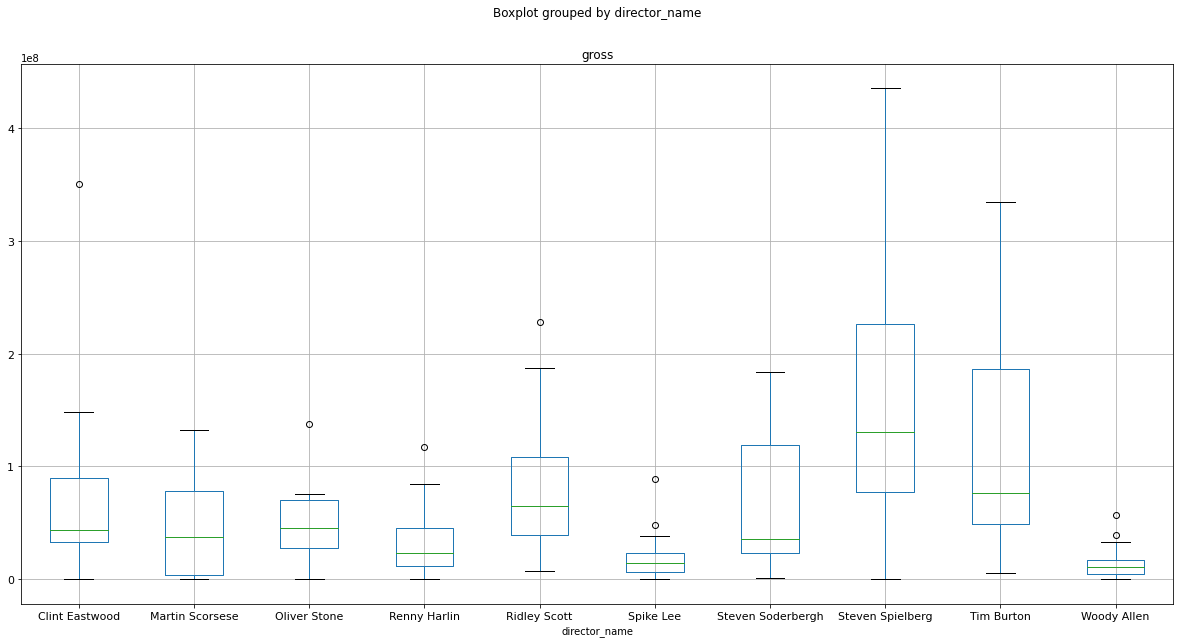

In [409]:
# The list of top 10 directors
top_directors_ls = top_directors['director_name'].tolist()
top_directors_ls

# The gross of every movies directed by the top 10 directors.
top_directors_gross = data[data['director_name'].isin(top_directors_ls)][['director_name', 'gross']]
top_directors_gross

# Plotting the gross of movies directed by every top 10 director in a boxplot.
boxplot = top_directors_gross.boxplot(by = 'director_name', column = 'gross', fontsize = 11, figsize = (20, 10))
boxplot

We can see that Steven Spielberg have directed a most of the highest-grossing films recorded in the database.

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

<AxesSubplot:xlabel='num_critic_for_reviews', ylabel='imdb_score'>

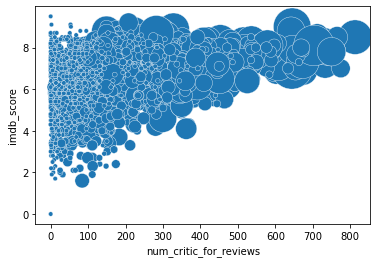

In [410]:
var = data[['num_critic_for_reviews', 'imdb_score', 'gross']]
scttr_plot = sns.scatterplot(data = var, x = "num_critic_for_reviews", y = "imdb_score", size = "gross", legend = False, sizes = (20, 2000))
scttr_plot

The x-axis refers to the num_critic_for_reviews, the y-axis refers to the imdb_score, and the size of the bubbles refers to the gross. This shows that most of the highest-grossing films in the database have high imdb_score and num_critic_for_review.

## Compute Sales (Gross - Budget), add it as another column

In [411]:
data['sales'] = data['gross'] - data['budget']
data[['gross', 'budget', 'sales']]

,gross,budget,sales
0,760505847.0,237000000.0,523505847.0
1,309404152.0,300000000.0,9404152.0
2,200074175.0,245000000.0,-44925825.0
3,448130642.0,250000000.0,198130642.0
4,0.0,0.0,0.0
...,...,...,...
5039,0.0,0.0,0.0
5040,0.0,1400.0,-1400.0
5041,10443.0,0.0,10443.0
5042,85222.0,1100.0,84122.0


## Which directors garnered the most total sales?

In [412]:
# filtered data frame
var = data[['director_name', 'sales']]

# sums up the sales of every director and add the total sales as a new column
var['total_sales'] = var.groupby(['director_name'])['sales'].transform('sum')

# removes all duplicate rows (clean up)
# sort the directors based on total sales
highest_sales = var.drop_duplicates('director_name').sort_values(by = 'total_sales', ascending = False)

# shows the output
highest_sales[['director_name', 'total_sales']]

,director_name,total_sales
54,Steven Spielberg,2.451332e+09
236,George Lucas,1.386641e+09
0,James Cameron,1.199626e+09
8,Joss Whedon,1.000887e+09
202,Chris Columbus,9.417076e+08
...,...,...
1517,Hayao Miyazaki,-2.444860e+09
3005,Lajos Koltai,-2.499804e+09
2334,Katsuhiro Ôtomo,-3.226670e+09
2994,Chan-wook Park,-4.210905e+09


## Plot sales and average likes as a scatterplot. Fit it with a line.

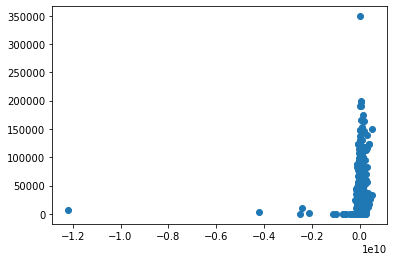

In [413]:
plt.scatter(data['sales'], data['movie_facebook_likes'])

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

The genre with the highest total sales. Not part of the answer but I just want to keep it.

In [414]:
genres = ['Romance', 'Comedy', 'Action', 'Fantasy']
var = data[data['genres'].isin(genres)][['genres', 'sales']]
var['total_sales'] = var.groupby(['genres'])['sales'].transform('sum')
highest_sales = var.drop_duplicates('genres').sort_values(by = 'total_sales', ascending = False)
highest_sales[['genres', 'total_sales']]

,genres,total_sales
279,Comedy,3.410157e+09
206,Fantasy,1.249586e+07
4163,Romance,-7.293430e+07
217,Action,-2.333746e+08


The histogram showing the sales of the four genres.

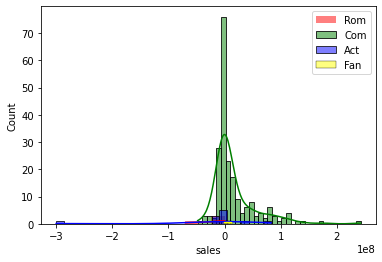

In [415]:
ax = sns.histplot(data[data.genres == 'Romance']["sales"], color="red", label="Rom", kde=True, linewidth=0)
sns.histplot(data[data.genres == 'Comedy']["sales"], color="green", label="Com", kde=True, ax=ax)
sns.histplot(data[data.genres == 'Action']["sales"], color="blue", label="Act", kde=True, ax=ax)
sns.histplot(data[data.genres == 'Fantasy']["sales"], color="yellow", label="Fan", kde=True, ax=ax)
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [417]:
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)
data[['actor_1_name', 'actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes', 'average_actor_likes']]

,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,average_actor_likes
0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,930.333333
1,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,15333.333333
2,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,3851.333333
3,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,24333.333333
4,Doug Walker,131.0,Rob Walker,12.0,0,0.0,47.666667
...,...,...,...,...,...,...,...
5039,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,319.0,584.333333
5040,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,0.0,0.000000
5041,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,489.0,718.000000
5042,John August,86.0,Brian Herzlinger,23.0,Jon Gunn,16.0,41.666667


## Copying the whole dataframe

In [418]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

In [419]:
# list of all columns
col_ls = list(data.columns)

# list of the data type of each column
col_type_ls = list(data.dtypes)

for i in range(len(col_ls)):
    
    # will check if the column is of type numeric
    # float64 only since there's no other numeric type here except int64 which is just the index
    if str(type(col_type_ls[i])) == "<class 'numpy.dtype[float64]'>":
        
        # performs the formula for normalization
        max = df[str(col_ls[i])].max()
        min = df[str(col_ls[i])].min()
        df[str(col_ls[i])] = (df[str(col_ls[i])] - min) / (max-min)
        
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,2,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
